# DS Lab Assignment 5

# Kadali Sai Vivek
# 197139

# 1. Write a program to implement Linear regression using Scikit learn.

In [1]:
#importing all Libraries needed

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE

import pandas as pd

import numpy as np

In [2]:
#Importing the data
dataset=pd.read_csv("Salary_data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# Splitting the data
data=np.array(dataset)

X=data[:,0] # Independent Variable
Y=data[:,1].reshape(data.shape[0],1) # Dependent Variable

X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)




In [4]:
# Build the model using the training data
model = LinearRegression(normalize = True)
model.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [5]:
# Predict and evaluate
Y_pred = model.predict(X_test)
error = MAE(Y_test, Y_pred)
print(f'MAE error is {error}')


MAE error is 6286.453830757749


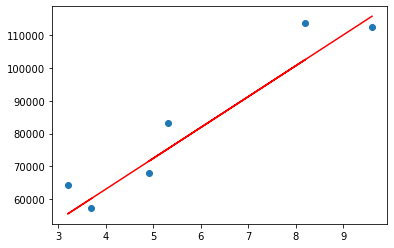

In [6]:
#Plotting

import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test)
X_test=np.array(X_test)
plt.plot(X_test, Y_pred, 'r')

# 2. Implement Logistic Regression for binary classification.

In [7]:
import pandas as pd
import numpy as np

dataset=pd.read_csv("heart.csv")
print("Size of the Dataset is : ",dataset.shape)
data=np.array(dataset)
dataset

Size of the Dataset is :  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
X=data[:,:-1] #Independent Variable
Y=data[:,-1].reshape(X.shape[0],1)   #Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)
print("Size of Training set Dependent Variables :",x_train.shape)
print("Size of Training set Independent Variables :",y_train.shape)
print("Size of Testing set Dependent Variables :",x_test.shape)
print("Size of Testing set Independent Variables :",y_test.shape)


Size of Training set Dependent Variables : (242, 13)
Size of Training set Independent Variables : (242, 1)
Size of Testing set Dependent Variables : (61, 13)
Size of Testing set Independent Variables : (61, 1)


In [9]:
#Defining Sigmoid function 
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [10]:
def model(x_train, y_train, Num_of_iterations, Learning_rate): #Model for Binary Logistic Regression
    theta = np.zeros((x_train.shape[1], 1)) # Initializing theta
    costs = []                  # Storing Cost values 
    m = x_train.shape[0]
    for i in range(Num_of_iterations):
        
        Hx = sigmoid(np.dot(x_train, theta)) #Calcualting Sigmoid of (X.theta)
        cost = -(1 / m) * np.sum(y_train * np.log(Hx) + (1 - y_train) * np.log(1 - Hx)) #Calculating Cost Function
        dtheta = (1 / m) * np.dot(x_train.T, (Hx - y_train))  # derivative of the cost function with respect to theta
        theta = theta - Learning_rate * dtheta               # modifying the parameter theta 
        
        if i % 100 == 0:
            costs.append(cost)          #Storing Cost value for Plotting
    
    #Plotting
    plt.plot(costs)
    plt.ylabel('J (θ)')
    plt.xlabel('Number of iterations (per 100) ')
    plt.title("Learning rate = " + str(Learning_rate))
    plt.show()
    
    return theta

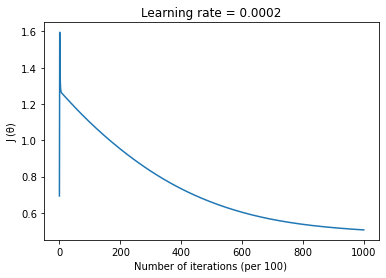

In [11]:
#Creating the model usig Training Data
theta = model(x_train, y_train, Num_of_iterations = 100000, Learning_rate = 0.0002)

In [12]:
# Predicting Based on the model created using Testing Data
m = x_test.shape[0] # Number of entries
y_pred = np.zeros((m, 1))
Hx = sigmoid(np.dot(x_test, theta)) # using sigmoid function 
for i in range(Hx.shape[0]):
    if (Hx[i][0] > 0.5): # predicting the target as 1 if y_pred > 0.5
        y_pred[i][0] = 1


#Compairing Original and Predected Data  
num_of_matched = 0;
num_of_unmatched = 0;
for i in range(y_pred.shape[0]):
    if y_test[i]==y_pred[i]:
        print("Matched")
        num_of_matched+=1
    else :
        print("Not Matched")
        num_of_unmatched+=1


Not Matched
Matched
Matched
Matched
Not Matched
Matched
Matched
Matched
Matched
Matched
Matched
Not Matched
Not Matched
Matched
Matched
Not Matched
Matched
Not Matched
Matched
Matched
Matched
Matched
Not Matched
Matched
Matched
Matched
Matched
Not Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Not Matched
Matched
Not Matched
Not Matched
Matched
Matched
Matched
Matched
Not Matched
Not Matched
Matched
Matched
Matched
Matched
Matched
Not Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched


In [13]:

import math
# Calculating Root mean square Error 
# error=math.sqrt(np.mean((y_pred-y_test)**2))
# print("\nMAE root mean squeare error is ",error)


error=(num_of_unmatched)/(num_of_unmatched+num_of_matched)
print("Error is :",error)
print("Accurace of the model is : ",1-error)

Error is : 0.22950819672131148
Accurace of the model is :  0.7704918032786885
